# 2. INTRODUCTION

**2.1 Identity**
- Name : Daniel Satria


**2.2 Dataset Explanation**
- The dataset is about information of credit card user and do segmentation.


**2.3 Objective**
- Getting insight from the dataset / EDA.
- Creating machine learning model and test it to our dataset to makes clustering of dataset.
- Creating model evaluation and model improvement.
- Drawing conclusion from overall milestone project.

**2.4 Notebook Disclaimer**
- I will do the title/explanation first, then later write the code.
- The title means to explain what I do or try to do with the code or to explain the output of the code itself.

___

# 3. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

___

# 4. DATA LOADING

4.1 Loading dataset
- Here I load the dataset that will be used for this Graded Challenge 4.
- I use head and tail method to show the first 5 and the last 5 of the dataset as shown below.

In [2]:
df = pd.read_csv('h8dsft_P1G4_daniel_satria.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [3]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


____

# 5. EDA / Exploratory Data Analysis 

5.1 Dataset shape
- There are 4475 rows and 18 columns in our dataset.

In [4]:
df.shape

(4475, 18)

5.2 Checking missing value
- There is 155 missing value in our dataset.
- All of them are in MINIMUM_PAYMENTS column.
- I decide not to drop the missing value but to handle it instead.
- The handling step, I will perform it in Feature Engineering / Data Preprocessin in next section.

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

5.3 Checking duplicated data
- There is no duplicated data in our dataset.

In [6]:
df.duplicated().sum()

0

5.4 Getting data inference
- Set the seed of random set, so we can call the data inference without randomly generated again later.
- Here I take two rows, and as we could see below there is no missing value in the data inference included.
- We got the data from index 88 & 4189.

In [7]:
# assign random seed, so the data inference won't randomly be generated all over again whenever we call it
np.random.seed(77)

# taking the 2 data inference from our dataset
data_inf = df.sample(2)
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
88,7209,49.074293,0.818182,330.25,330.25,0.0,0.000000,0.25,0.25,0.0,0.000000,0,5,2500.0,509.309215,134.968858,0.000000,12
4189,6927,4218.956639,1.000000,0.00,0.00,0.0,4734.304587,0.00,0.00,0.0,0.583333,44,0,4500.0,5557.539676,1434.238518,0.083333,12


5.5 Dropping data inference from original dataset
- Dropping the data inference from the dataset, so later we can test the model with brand new data.
- Now, our total dataset have 4473 rows.

In [8]:
df.drop(index=data_inf.index, inplace=True)
df.shape

(4473, 18)

5.6 Getting insight from describe
- It seems that most the columns are continous number.
- The categorigal columns is TENURE, since it's the only column that have discreet value.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4473.0,4473.840599,2583.925070,1.000000,2237.000000,4473.000000,6709.000000,8949.00000
BALANCE,4473.0,1562.950492,2072.004825,0.000000,124.580010,871.355430,2046.306856,18495.55855
BALANCE_FREQUENCY,4473.0,0.876919,0.238267,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4473.0,1003.626092,2060.416103,0.000000,39.580000,360.000000,1104.650000,41050.40000
ONEOFF_PURCHASES,4473.0,596.562714,1653.766827,0.000000,0.000000,45.650000,576.000000,40624.06000
INSTALLMENTS_PURCHASES,4473.0,407.292245,880.954593,0.000000,0.000000,88.870000,456.000000,14686.10000
CASH_ADVANCE,4473.0,983.670238,2060.093021,0.000000,0.000000,0.000000,1136.000468,47137.21176
PURCHASES_FREQUENCY,4473.0,0.490743,0.402914,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4473.0,0.202336,0.298254,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4473.0,0.364049,0.397617,0.000000,0.000000,0.166667,0.750000,1.00000


5.7 Getting pattern by plotting some of columns
- Here I use scatter plot to find if there's any pattern cluster of the data.
- As we can see, there is no clear pattern for clustering in below plots even the columns have correlation one another.
- Value number 12 from TENURE column seems to dominate the plot.

<AxesSubplot:xlabel='PURCHASES_FREQUENCY', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

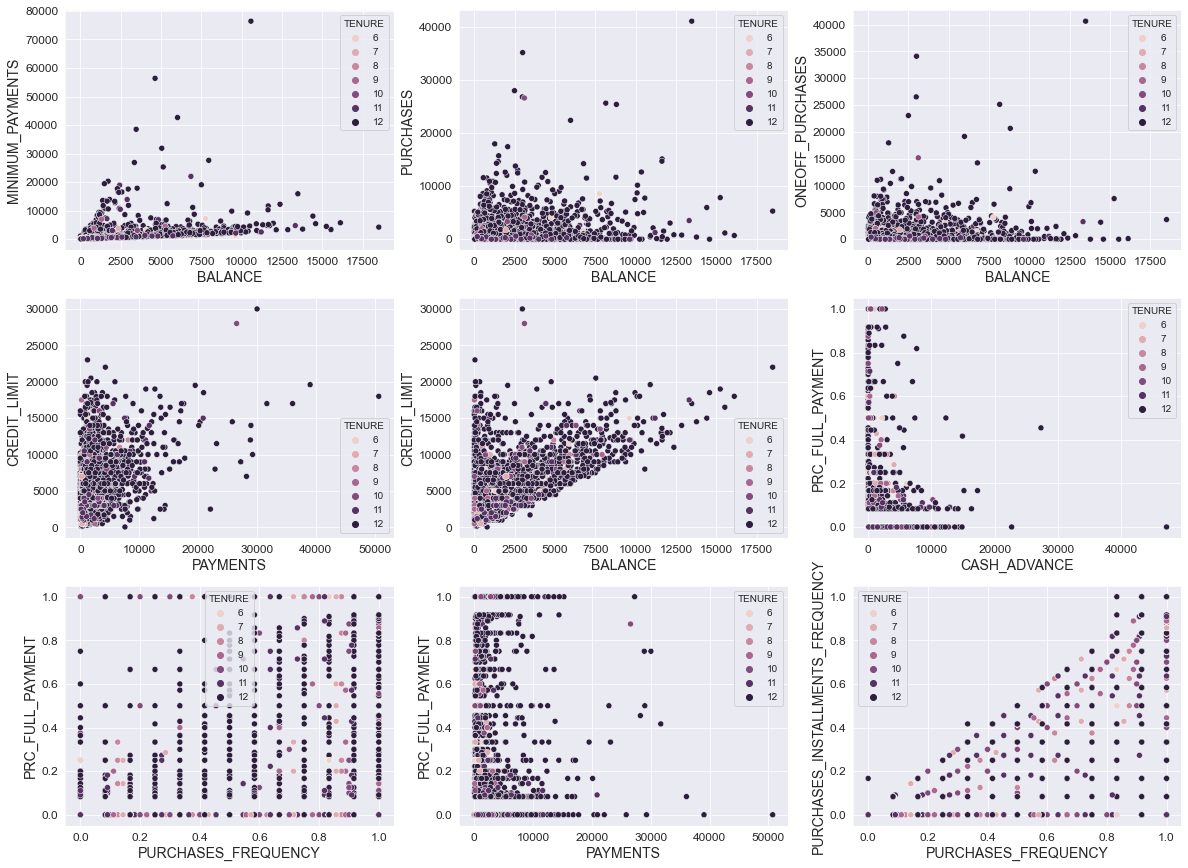

In [10]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.scatterplot(data=df, x='BALANCE', y='MINIMUM_PAYMENTS', hue='TENURE', ax=ax[0,0])
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='TENURE', ax=ax[0,1])
sns.scatterplot(data=df, x='BALANCE', y='ONEOFF_PURCHASES', hue='TENURE', ax=ax[0,2])
sns.scatterplot(data=df, x='PAYMENTS', y='CREDIT_LIMIT', hue='TENURE', ax=ax[1,0])
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT', hue='TENURE', ax=ax[1,1])
sns.scatterplot(data=df, x='CASH_ADVANCE', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[1,2])
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[2,0])
sns.scatterplot(data=df, x='PAYMENTS', y='PRC_FULL_PAYMENT', hue='TENURE', ax=ax[2,1])
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='TENURE', ax=ax[2,2])

5.8 Insight from tenure column
- As I said previously, the value 12 in this column have the highest amount among others.

<AxesSubplot:xlabel='TENURE', ylabel='count'>

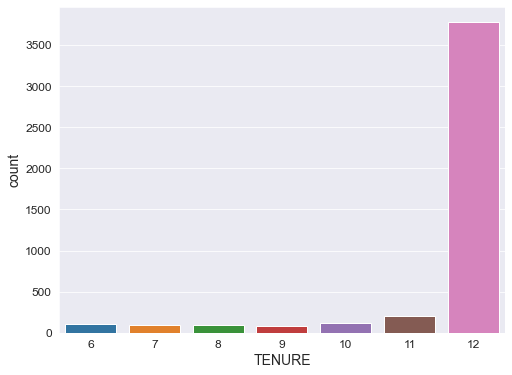

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x='TENURE')

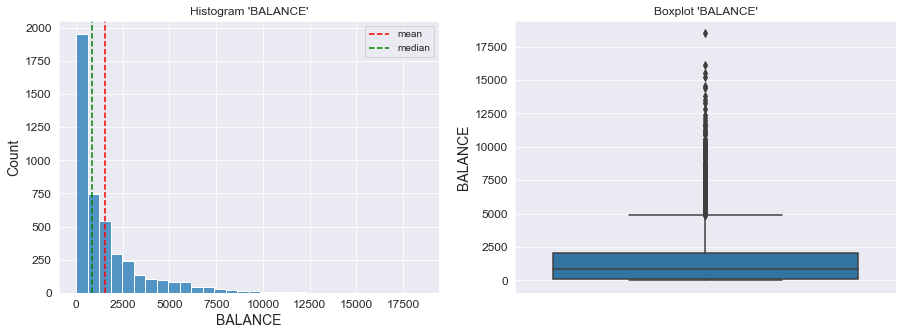

BALANCE Kurtosis: 7.187420148513244
BALANCE Skewness: 2.330175072863143
Columns 'BALANCE' is right skewed


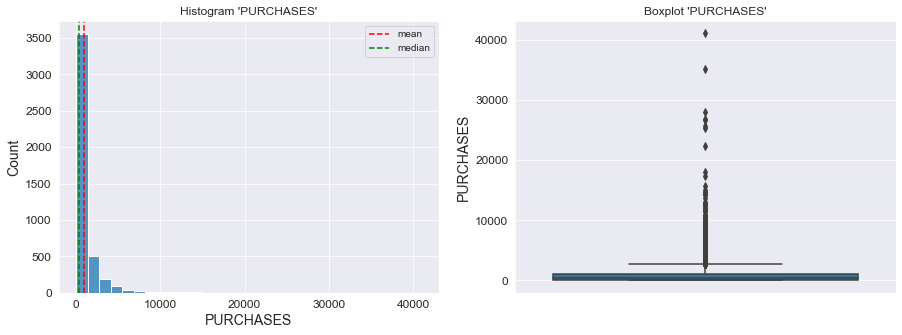

PURCHASES Kurtosis: 85.09855783668954
PURCHASES Skewness: 7.07042969254684
Columns 'PURCHASES' is right skewed


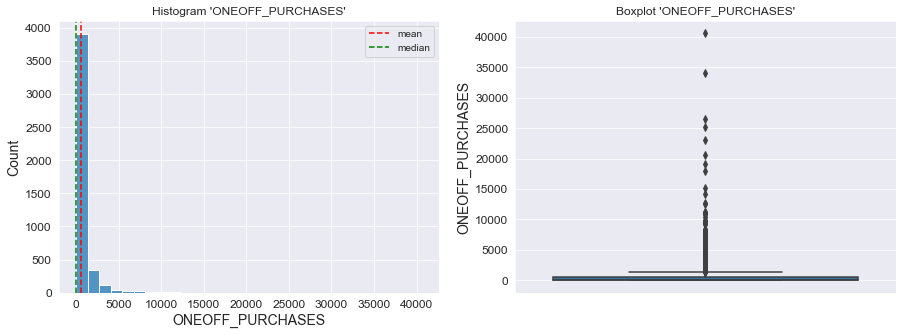

ONEOFF_PURCHASES Kurtosis: 164.0440610944369
ONEOFF_PURCHASES Skewness: 9.949016180718505
Columns 'ONEOFF_PURCHASES' is right skewed


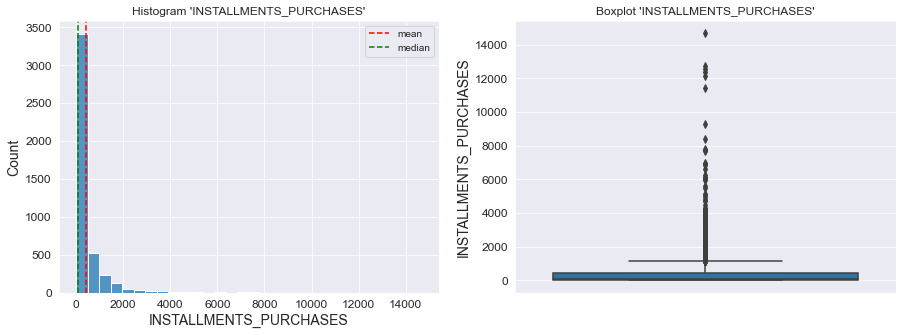

INSTALLMENTS_PURCHASES Kurtosis: 65.31291642079081
INSTALLMENTS_PURCHASES Skewness: 6.329547201059427
Columns 'INSTALLMENTS_PURCHASES' is right skewed


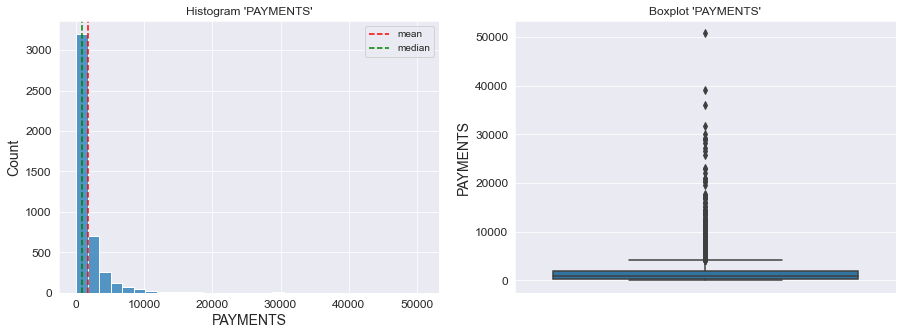

PAYMENTS Kurtosis: 54.79434288400963
PAYMENTS Skewness: 5.7501803344598885
Columns 'PAYMENTS' is right skewed


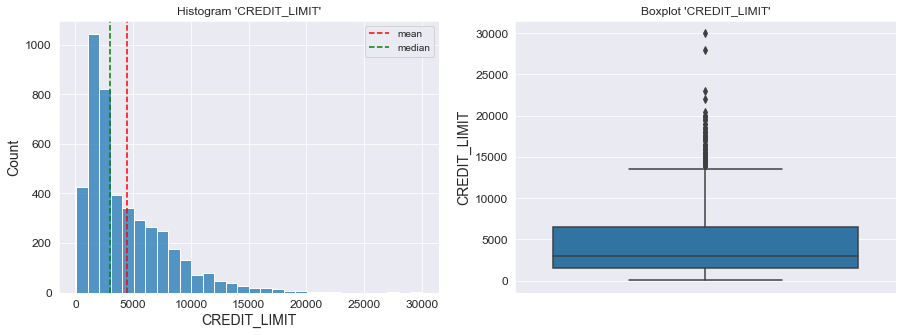

CREDIT_LIMIT Kurtosis: 2.7761758653960773
CREDIT_LIMIT Skewness: 1.4984343924825754
Columns 'CREDIT_LIMIT' is right skewed


In [12]:
#making function for plotting the distribution of the data
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' is right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' is left skewed".format(col))

#plotting the distribution data of limit_balance
plot_dist(df, 'BALANCE')
plot_dist(df, 'PURCHASES')
plot_dist(df, 'ONEOFF_PURCHASES')
plot_dist(df, 'INSTALLMENTS_PURCHASES')
plot_dist(df, 'PAYMENTS')
plot_dist(df, 'CREDIT_LIMIT')

____

# 5. FEATURE ENGINEERING & PRE-PROCESSING

5.1 Handling missing value
- To handling missing value, here  use KNN Imputer from sklearn.
- By using KNN Imputer, the missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.
- Since the result will be array, here I assign it to dataframe again and rename the column names.


In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [14]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [16]:
from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=7)
data_clean = impute_knn.fit_transform(df)

data_clean = pd.DataFrame(data_clean)

#reassig name to every column
data_clean.columns = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

data_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091.0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,500.0,0.000000,167.886218,0.0,8.0
1,5069.0,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,7000.0,0.000000,120.018849,0.0,8.0
2,6075.0,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8.0
3,6291.0,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8.0
4,7755.0,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.316424,137.846006,0.0,8.0


5.2 Rechecking the missing value
- Here we try to recheck the missing, whether all of them are handle or still there is left.
- As shown below, all the missing value have been imputed and handled by KNN Imputer, so there is no missing values left.

In [17]:
data_clean.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

5.3 Checking Multi-colinearity
- We calculate the VIF coefficient using statsmodels library.
- Here, I could see that there are 8 columns that have VIF coefficient more than 5.
- So, at least we could reduce the dimention to 9.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_no_id = data_clean.drop(columns='CUST_ID', axis=1) 

#making dataframe for VIF calculations
vif_data = pd.DataFrame()
vif_data["feature"] = data_no_id.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_no_id.values, i) for i in range(len(data_no_id.columns))]

#soring the VIF value
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
2,PURCHASES,54337.872428
3,ONEOFF_PURCHASES,31986.079705
4,INSTALLMENTS_PURCHASES,9720.287536
6,PURCHASES_FREQUENCY,26.561158
1,BALANCE_FREQUENCY,17.869520
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.192157
16,TENURE,16.283067
7,ONEOFF_PURCHASES_FREQUENCY,5.640904
9,CASH_ADVANCE_FREQUENCY,4.793560
12,CREDIT_LIMIT,4.598231


5.4 Handling outliers
- Here I use Winsorizer to handle the outliers.
- I set the threshold is 3 since the data is extremely skew.

In [19]:
from feature_engine.outliers import Winsorizer

capper_winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
capper_winsor.fit(data_no_id)
data_clean_from_outliers = capper_winsor.transform(data_no_id)

5.5 Scaling
- Here I will MinMaxScaler to scale the number columns since the data is extremely skew.

In [20]:
#Import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#fit the scaler
scaler = MinMaxScaler()
scaler.fit(data_clean_from_outliers)

#transform the x_train number and assign to dataframe
data_no_outliers_scaled = scaler.transform(data_clean_from_outliers)
data_clean_scaled = pd.DataFrame(data_no_outliers_scaled)
data_clean_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000778,0.00,0.016653,0.031250,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.032609,0.000000,0.096365,0.0,0.333333
1,0.000000,0.00,0.065142,0.122243,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.503623,0.000000,0.068887,0.0,0.333333
2,0.153780,0.55,0.058248,0.109306,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.146341,0.083333,0.355001,1.000000,0.0,0.333333
3,0.053677,0.00,0.425570,0.798611,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.083333,0.719603,0.049030,0.0,0.333333
4,0.089394,1.00,0.222037,0.416667,0.0,0.0,0.125,0.2,0.0,0.0,0.0,0.024390,0.068841,0.051147,0.079120,0.0,0.333333


5.4 Dimensionality Reduction to get the optimum number of clusters.
- Here use PCA to reduce the dimension of dataset.
- Based on VIF column, I will set the components to 9.
- As we can see, the total EVR is 0.94.

In [21]:
from sklearn.decomposition import PCA

pca_scaled = PCA().fit(data_clean_scaled)

print('Total EVR scaled :', np.sum(pca_scaled.explained_variance_ratio_))

Total EVR scaled : 1.0


5.5 Plotting the dimension-reduced data
- It's seem that the elbow is in 6.
- However, with 8 dimension we can get more than 90% information.
- I think 8 clusters will be good.

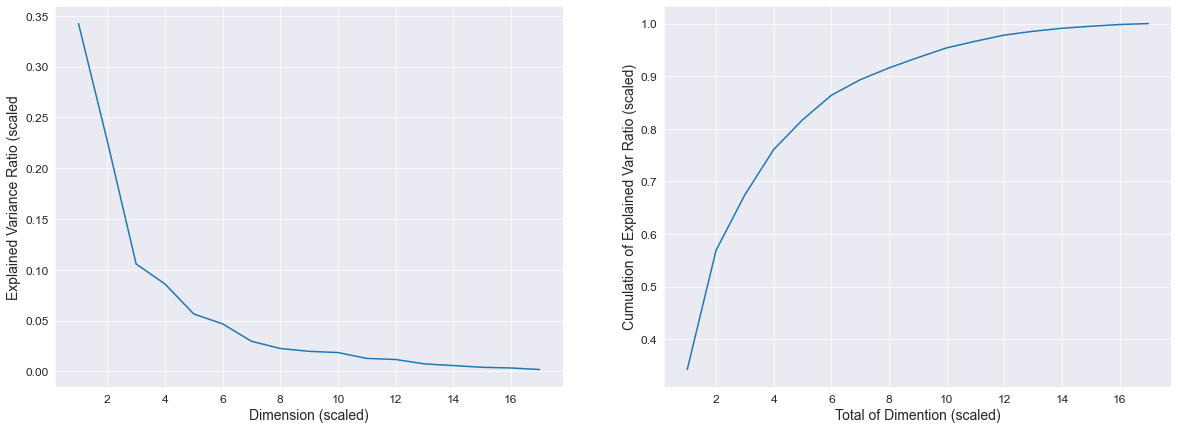

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,7))

ax[0].plot(range(1,18),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Dimension (scaled)')
ax[0].set_ylabel('Explained Variance Ratio (scaled')

ax[1].plot(range(1,18),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Total of Dimention (scaled)')
ax[1].set_ylabel('Cumulation of Explained Var Ratio (scaled)')

plt.show()


5.7 Dimension reduction to visualize data in 2D.
- Here it seems that the data overlapping, and we can't distinguish one to another by the location in the plot.

<AxesSubplot:>

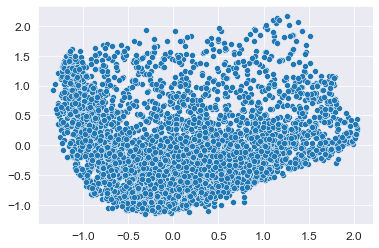

In [23]:
pca_2d = PCA(n_components=2).fit(data_clean_scaled)
data_scaled_2d = pca_2d.transform(data_clean_scaled)

sns.scatterplot(x=data_scaled_2d[:,0], y=data_scaled_2d[:,1])


5.8 Dimention reduced to be fitted in model
- As I explained above, we come to conclusion that with 8 dimension we can grasp more than 90% of the information, we will reduce the dimension 8.
- So we fit the dimension-reduced data to the model.

In [24]:
pca_7d = PCA(n_components=8).fit_transform(data_clean_scaled)
df_data_7d = pd.DataFrame(pca_7d)

df_data_7d.head()

,0,1,2,3,4,5,6,7
0,-0.706048,-0.878105,0.342664,-0.025916,0.504170,0.299049,0.164762,0.387567
1,-0.636364,-0.785248,0.443605,0.019272,0.544500,0.155274,0.249406,0.296713
2,-0.558082,-0.192864,0.183749,-0.346942,0.312390,-0.183853,0.282258,0.606827
3,-0.264262,-0.496718,0.908197,0.124868,0.585426,0.105934,-0.261304,0.559837
4,-0.419128,-0.436955,0.331016,-0.523102,-0.168660,0.255978,-0.072992,0.613527


___

# 6. Clustering with KMeans

6.1 Model definiton, fit and  predict
- Here I use 3 clusters of KMeans just to explore the data.
- Later I will examine which is 3 is already good or we can revise the number of the cluster.

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=892)
y_predict_k3 = kmeans.fit_predict(df_data_7d)

**MODEL EVALUATION**

6.2 Elbow Method
- It seems that the elbow is in K 3 4, or 5.
- But, for another reference we'll see the silhouette method also.

Text(0, 0.5, 'Inertia')

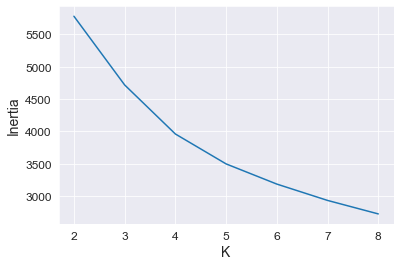

In [26]:
K=[2,3,4,5,6,7,8]

inertia=[KMeans(n_clusters=i).fit(df_data_7d).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

6.3 Silhouette Method
- Here I try to look how the clusters are if the number K are 2 - 9.
- Based on below silhouette plot, all of the plot passes the average silhouette score.
- Yet, if we look closely, 3, 4, 5, 6 have the best and similar shape compared to others.
- As my personal judgement, the 3 is the best one since all the shape of the silhouette are the same and good.

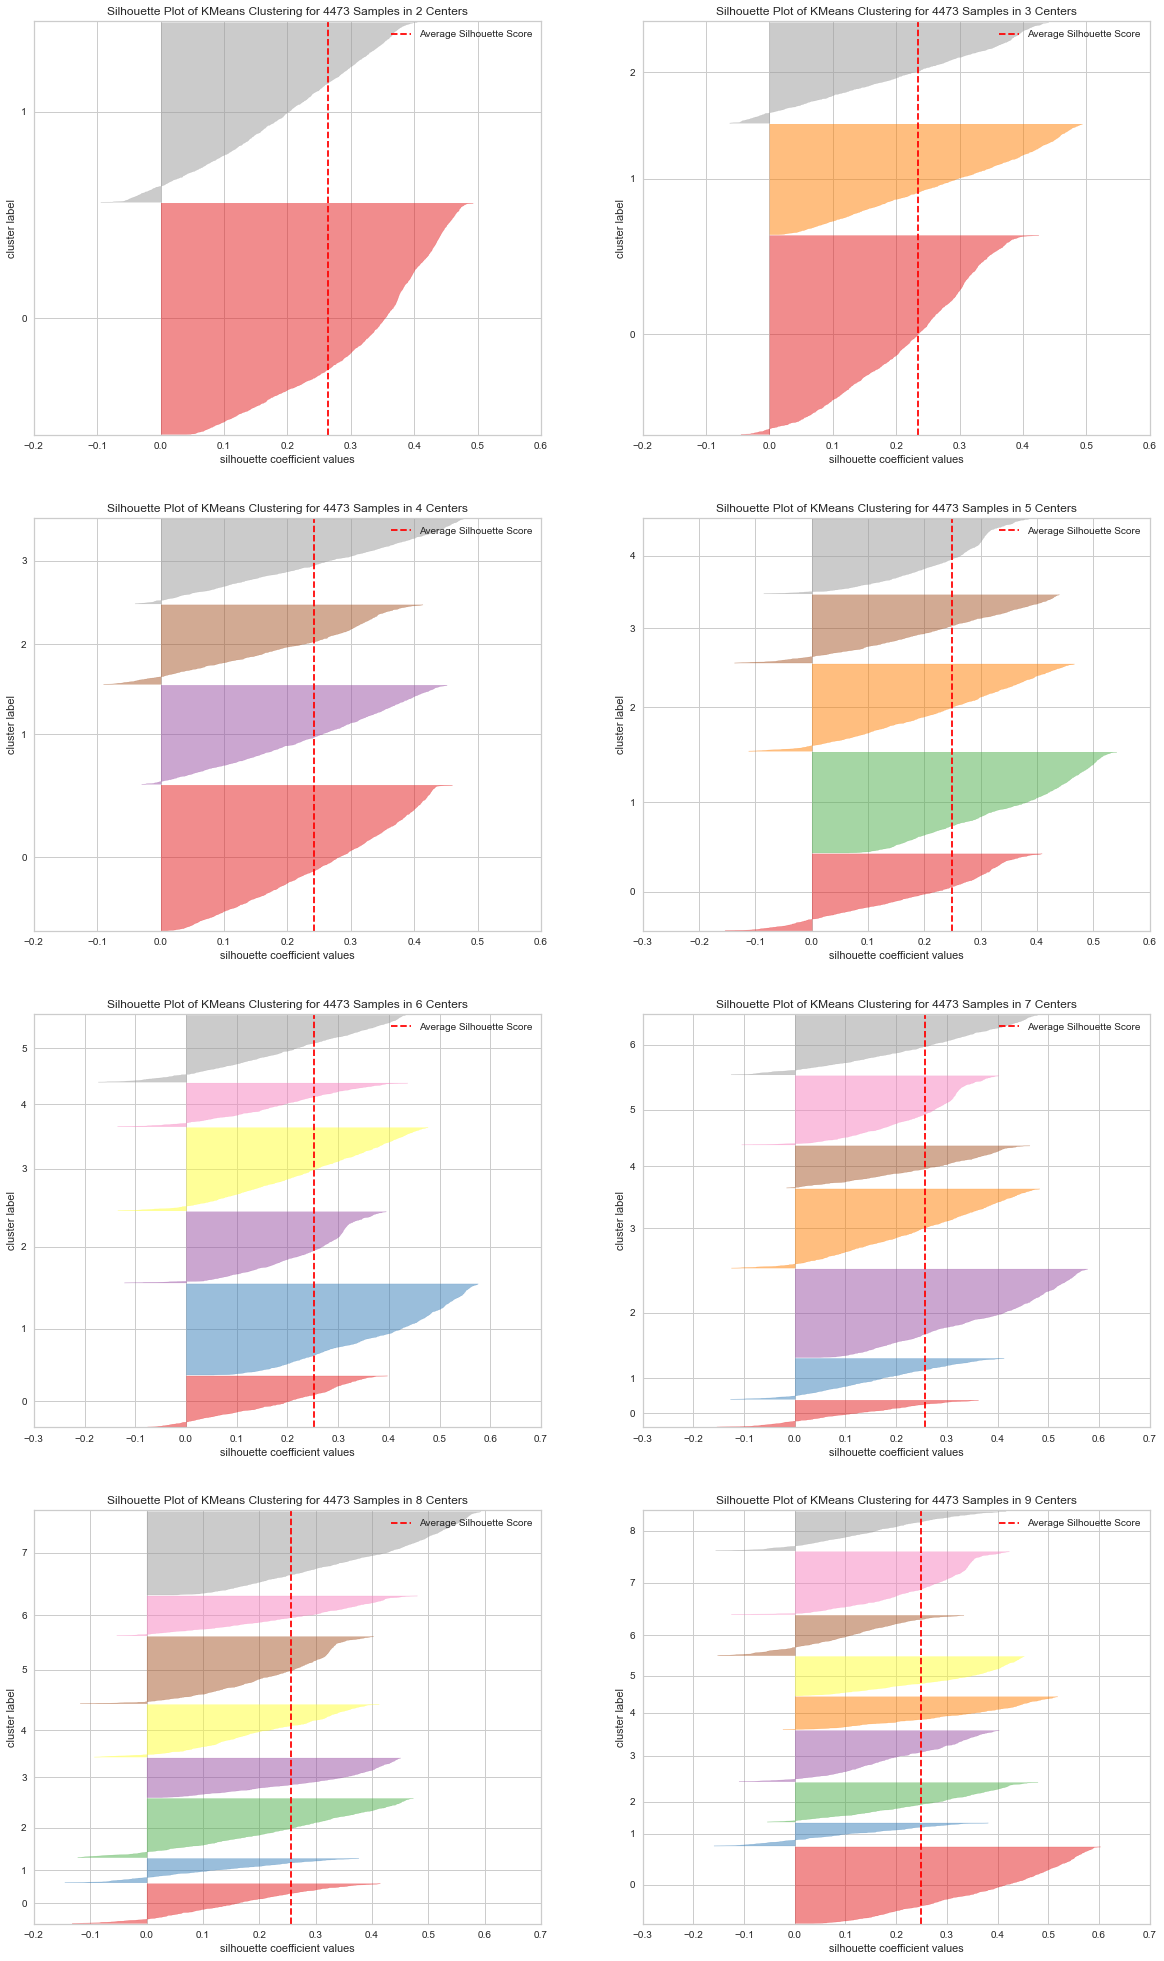

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, axs = plt.subplots(4, 2, figsize=(20, 35))
axs = axs.reshape(8)
for i, k in enumerate(range(2, 10)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters=k, random_state=1), ax=ax)
    sil.fit(df_data_7d)
    sil.finalize()

6.4 Calinski-Harabasz Index
- Here I use calinski_harabasz_score from sklearn metrics to calculate the calinski harabasz score.
- It says that the higher the index, the high the performance.
- In this case, we got 1537.7634308052611 index, meaning that the distance between one cluster to another is relatively sparsed and distinguishable.
- Thus, it's good.

In [28]:
from sklearn.metrics.cluster import calinski_harabasz_score

calinski_harabasz_score(df_data_7d, y_predict_k3)

1537.7634308052627

6.5 Davies-Bouldin Index
- The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. The minimum score is zero, and the lower values the better clustering performance.
- The index score from our model is 1.433224517874154, it means that our dataset is quite good to be divided to 3 different clusters.

In [29]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_data_7d, y_predict_k3)

1.4332245178741534

___

# 7. Exploratory Data Analysis of KMeans (Cluster = 3)

7.1 Add cluster to our dataset
- Here we add the cluster label from KMeans predict to our dataset to new column.

In [30]:
data_clean['Cluster_k3'] = y_predict_k3
data_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_k3
0,3091.0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,500.0,0.000000,167.886218,0.0,8.0,0
1,5069.0,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,7000.0,0.000000,120.018849,0.0,8.0,0
2,6075.0,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8.0,0
3,6291.0,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8.0,0
4,7755.0,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.316424,137.846006,0.0,8.0,0


7.2 Data Visualization with Dimension Reduction
- Here I use PCA again to reduce the dimension of the dataset, so we can visualize it into 2D.
- I also add the centroid from KMeans.
- As below plot shows that there are 3 clusters with clear borders.
- Some of the data may overlap since the border distance also overlapping.

<AxesSubplot:>

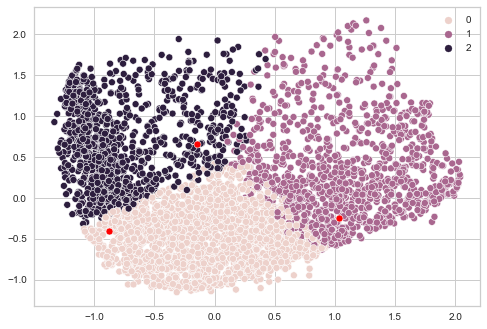

In [31]:
centroid = PCA(n_components=2).fit_transform(kmeans.cluster_centers_)

pca_2d = PCA(n_components=2).fit(data_clean_scaled)
data_scaled_2d = pca_2d.transform(data_clean_scaled)

sns.scatterplot(x=data_scaled_2d[:,0], y=data_scaled_2d[:,1], hue=data_clean.Cluster_k3)
sns.scatterplot(x=centroid[:,0], y=centroid[:,1], color='red')

7.3 Cluster distibution
- As shown below, cluster 0 have the highest data and followed by cluster 2 then 1.
- But, all of them have more than 1000 data per cluster, which mean there is no cluster with severe imbalance value.

<AxesSubplot:xlabel='Cluster_k3', ylabel='count'>

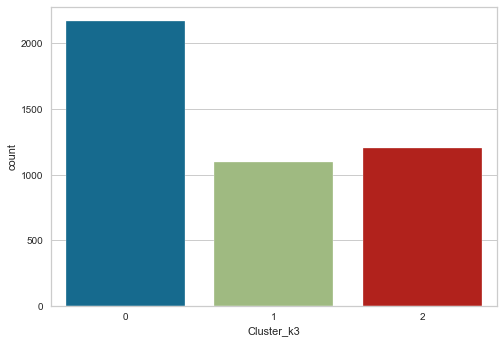

In [32]:
sns.countplot(data=data_clean, x='Cluster_k3')

7.4 Cluster Characteristic
- Since the scale of the value for every columns are different, here I'll divide the data to 2 plots.
- Also, I won't show all of the features.
- The ones I show here are the ones that seems important only.
- Cluster 1 is the highest amount of credit limit, payments, purchases, purchases frequency, one off purchases frequency and purchase installment frequency. However, it has average cash advance and cash advance frequency, since it's bigger than cluster 0, but less than cluster 2. It means that these kind of customers are superior ones compared to others clussters. We can label them with loyal customer, since they use frequently the credit card product as they have the biggest credit limit, purchases frequency, etc. The fact they have less cash advance than cluster 2 means that they are always credit card first than cash.
- Cluster 2 is the average type of customers. They have bigger credit limit & payments than cluster 0,  but less than cluster 1. However, these type of customers have biggest balance, cash balance, cash advance frequency. The fact that they usemore cash advance and biggest cash balance more than others suggest that they use the credit card service, but not too rely to them, and still use cash advance as well.
- Cluster 3 is the non-loyal customers. They have the lowest blance, purchases, credit limit and even cash advance. But, they have more purchase frequency and one off frequency than cluster 2, means that they may use the credit card to buy middle-priced goods.
- This explains why cluster 0 have the highest data, and in contrast cluster 1 have the lowest data. As the fact that, credit card customer that will be categorized as superior users should be lower than ordinary or non-loyal users.

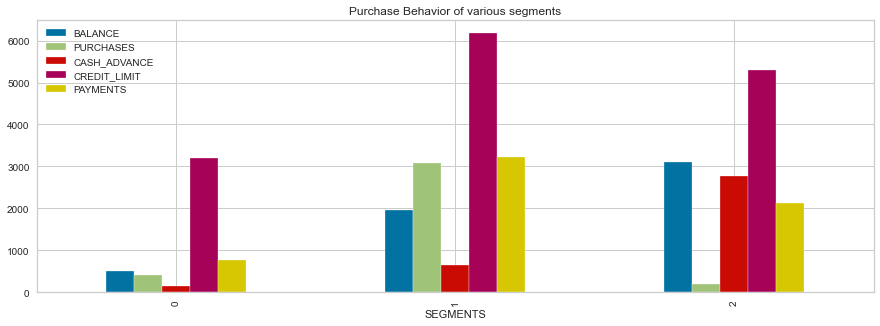

In [33]:
data_clean[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'Cluster_k3']].groupby('Cluster_k3').mean().plot.bar(figsize=(15, 5))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

Text(0.5, 0, 'Cluster')

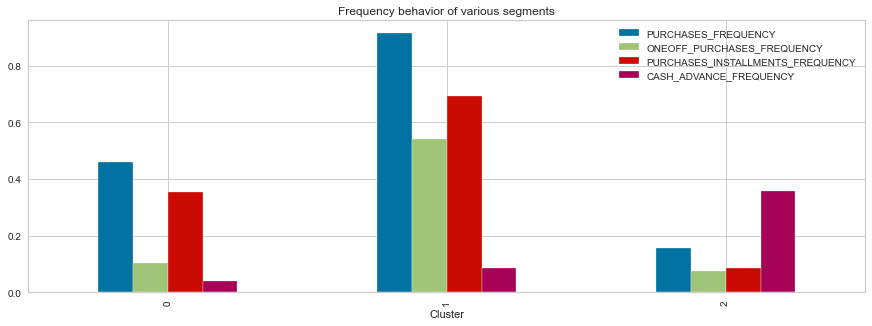

In [34]:
data_clean[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'Cluster_k3']].groupby('Cluster_k3').mean().plot.bar(figsize=(15, 5))
plt.title('Frequency behavior of various segments')
plt.xlabel('Cluster')

______

# 8. Spectral Clustering

8.1 Define model
- Here I set the cluster to 3 as well.
- Then fit the model with the data.

In [35]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=3, random_state=421)
sc_predict_k3 = sc1.fit_predict(df_data_7d)

8.2 Getting Clusters
- We assign the cluster name  to our new column.

In [36]:
data_clean['sc_3'] = sc_predict_k3
data_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_k3,sc_3
0,3091.0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,500.0,0.000000,167.886218,0.0,8.0,0,0
1,5069.0,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,7000.0,0.000000,120.018849,0.0,8.0,0,0
2,6075.0,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8.0,0,0
3,6291.0,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8.0,0,0
4,7755.0,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0.0,1.0,1000.0,215.316424,137.846006,0.0,8.0,0,0


**MODEL EVALUATION**

8.3 Calinski-Harabasz Index
- As I mentioned above, calinski_harabasz_score can be used to evalute the performance of clustering.
- It says that the higher the index, the high the performance.
- In this case, we got 1364.67369497079 index, meaning that the distance between one cluster to another is relatively sparsed and distinguishable. Thiis is even better compared index from KMeans.

In [37]:
from sklearn.metrics.cluster import calinski_harabasz_score

calinski_harabasz_score(df_data_7d, sc_predict_k3)

1364.67369497079

8.4 Davies-Bouldin Index
- As I explained above The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. 
- The minimum score is zero, and the lower values the better clustering performance.
- The index score from our model is 1.3525162325182858, it means that our dataset is quite good to be divided to 3 different clusters.
- The Index for Spectral Cluster is better than KMeans.

In [38]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_data_7d, sc_predict_k3)

1.3525162325182858

**EDA FOR SPECTRAL CLUSTER (C=3)**

8.5 Getting Insight from Spectral Clustering
- It seems from the result of spectral clustering, the superior customers is cluster 2. Since they have the highest amount in all aspects. It means that, cluster 1 in Kmeans, will have cluster 2 in Spectral Cluster.
- The average customers here is cluster 1. But, the non-loyal customer is the same that is cluster 0 for both of them.

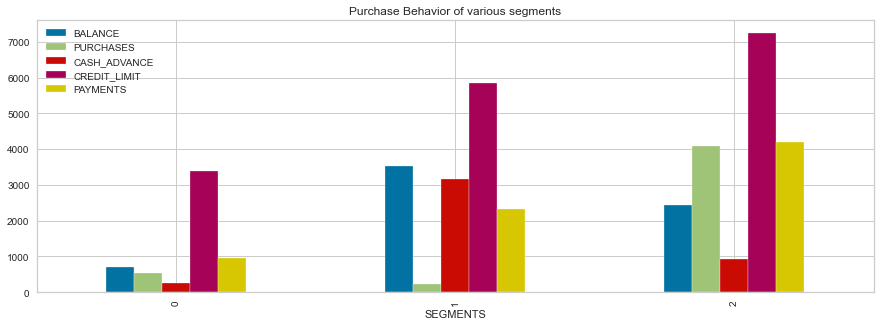

In [39]:
data_clean[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'sc_3']].groupby('sc_3').mean().plot.bar(figsize=(15, 5))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

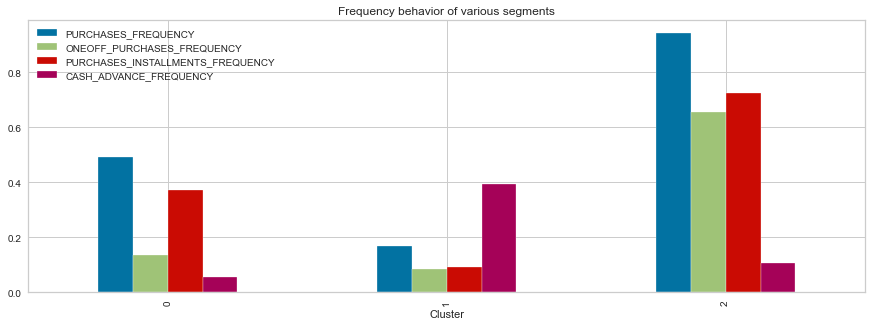

In [40]:
data_clean[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'sc_3']].groupby('sc_3').mean().plot.bar(figsize=(15, 5))
plt.title('Frequency behavior of various segments')
plt.xlabel('Cluster')
plt.show()

8.6 Checking Clusters 
- As our guess, cluster 1 is KMeans are clusters 2 in Spectral Clustering. They're the same but just having the different clusters name.
- In second data frame shows that both KMeans and Spectral Clustering have the same way to make cluster 0 from dataset.

In [41]:
sc_cluster_2 = data_clean[data_clean['sc_3'] == 2]
sc_cluster_2[['Cluster_k3', 'sc_3']].head()

,Cluster_k3,sc_3
194,1,2
215,1,2
232,1,2
256,1,2
262,1,2


In [42]:
sc_cluster_2 = data_clean[data_clean['sc_3'] == 0]
sc_cluster_2[['Cluster_k3', 'sc_3']].head()

,Cluster_k3,sc_3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


8.7 Spectral Clustering Cluster in 2D Visualization
- Here we can see that the data are indeed clustered in the plot with clear border in 3 cluster.
- Although, there are some data are located in other cluster and overlapping it, but the distribution of the data in the clusters are quite good.

<AxesSubplot:>

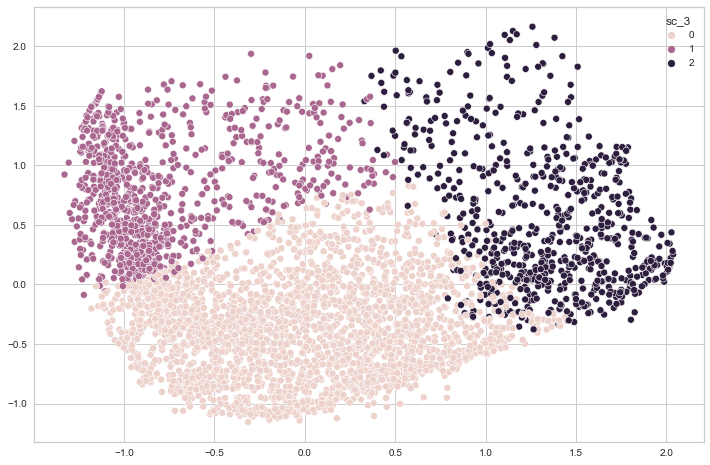

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=data_scaled_2d[:,0], y=data_scaled_2d[:,1], hue=data_clean.sc_3)

___

# 9. GAUSSIAN MIXTURE

9.1 Define model and fit
- Here I use Gaussian Mixture and set the hyper-parameter 3 to n_components as amount of our clusters.
- I also set the covariance type ti spherical, since from last visualization of the data from PCA 2D, the data is tend to be spherical.
- Then fit the model with our data.

In [44]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42, covariance_type='spherical')
gm_c3 = gm.fit_predict(df_data_7d)

9.2 Getting insight from Weight Cluster
- Here as we can see, the weighest cluster is the third cluster (cluster 2).
- Followed the first one, (cluster 0).

In [45]:
gm.weights_

array([0.37244807, 0.45679969, 0.17075224])

9.3 Assign the cluster to dataframe

In [46]:
data_clean ['gm_k3'] = gm_c3
data_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_k3,sc_3,gm_k3
0,3091.0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,...,0.0,1.0,500.0,0.000000,167.886218,0.0,8.0,0,0,0
1,5069.0,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,...,0.0,1.0,7000.0,0.000000,120.018849,0.0,8.0,0,0,0
2,6075.0,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,...,0.0,6.0,1200.0,1494.480376,2638.598410,0.0,8.0,0,0,0
3,6291.0,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,...,0.0,1.0,1200.0,3029.380326,85.428885,0.0,8.0,0,0,0
4,7755.0,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,...,0.0,1.0,1000.0,215.316424,137.846006,0.0,8.0,0,0,0


**MODEL EVALUATION**

9.4 Calinski-Harabasz Index
- As I mentioned above, calinski_harabasz_score can be used to evalute the performance of clustering.
- It says that the higher the index, the high the performance.
- In this case, we got 1360.3549636860773 index, meaning that the distance between one cluster to another is relatively sparsed and distinguishable. Although, it's less than index from Spectral Clustering, but higher than KMeans.

In [47]:
from sklearn.metrics.cluster import calinski_harabasz_score

calinski_harabasz_score(df_data_7d, gm_c3)

1360.3549636860773

9.5 Davies-Bouldin Index
- As I explained above The Davies-Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster. 
- The minimum score is zero, and the lower values the better clustering performance.
- The index score from our model is 1.4083392898618328, it means that our dataset is quite good to be divided to 3 different clusters.
- The Index for Gaussian Mixture is better than KMeans, but lower than Spectral Cluster.

In [48]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df_data_7d, gm_c3)

1.4083392898618328

9.6 BIC & AIC Score
- As we can see that if we choose the cluster more than 3, the AIC & BIC score are lower.
- Howeever, the difference score for two of them will be increased.
- So, 3 is a good option since the difference for both score won't be too far one another.

In [49]:
# Get `BIC` Score and `AIC` Score

print('BIC Score : ', gm.bic(df_data_7d))
print('AIC Score : ', gm.aic(df_data_7d))

BIC Score :  36529.46072973814
AIC Score :  36343.69210623859


In [50]:
# Train GMM with Various Number of Clusters

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(df_data_7d)
             for k in range(1, 11)]

             

In [51]:
# Get BIC and AIC Scores

bics = [model.bic(df_data_7d) for model in gms_per_k]
aics = [model.aic(df_data_7d) for model in gms_per_k]

for k in range(0, 10):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  33967.249228646695 	AIC :  33685.39338609565
Cluster :  2 	BIC :  19821.587998606978 	AIC :  19251.470498901454
Cluster :  3 	BIC :  9282.996701442327 	AIC :  8424.617544582326
Cluster :  4 	BIC :  -858.2877623846787 	AIC :  -2004.9285763991584
Cluster :  5 	BIC :  -9034.281146270987 	AIC :  -10469.183617439945
Cluster :  6 	BIC :  -15125.741468169146 	AIC :  -16848.905596492583
Cluster :  7 	BIC :  -20439.48747589177 	AIC :  -22450.913261369682
Cluster :  8 	BIC :  -23869.028232037715 	AIC :  -26168.715674670108
Cluster :  9 	BIC :  -27425.672794714872 	AIC :  -30013.621894501743
Cluster :  10 	BIC :  -30209.822545033167 	AIC :  -33086.033301974516


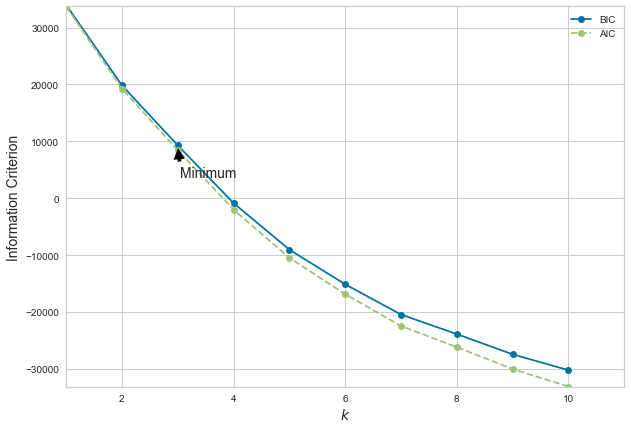

In [52]:
# Plot BIC Score and AIC Score

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 11, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.25, 0.5),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

**EDA for GAUSSIAN MIXTURE (C=3)**

9.7 Getting Insight from Gaussian Mixture Cluster
- It seems from the result of gaussian mixture clustter, the superior customers is cluster 1, the same with KMeans way. Since they have the highest amount in all aspects. 
- It means that, cluster 1 in Kmeans, will be cluster 1 also in Gaussian Mixture, but will have cluster 2 in Spectral Cluster.
- The distributtion of superior customer may be the same for Gaussian Mixture, Spectral Clustering & KMeans.
- However, there is a bit difference for average and non-loyal customer in Gaussian Mixture.
- In KMeans and Spectral Cluster the average customer and non-loyal have significant diferences. In Gaussian, there may be the differences but not too significant like in Kmeans and Spectral.
- However, as from plot we can conclude the the average customers are cluster 0 and non-loyal customers are cluster 2, since most of the aspects are higher on the clusters 0 than 1.

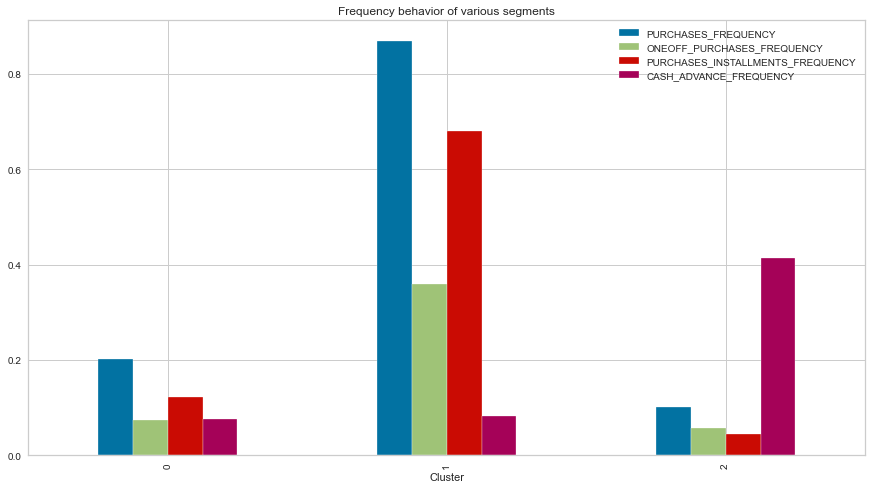

In [53]:
data_clean[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'gm_k3']].groupby('gm_k3').mean().plot.bar(figsize=(15, 8))
plt.title('Frequency behavior of various segments')
plt.xlabel('Cluster');

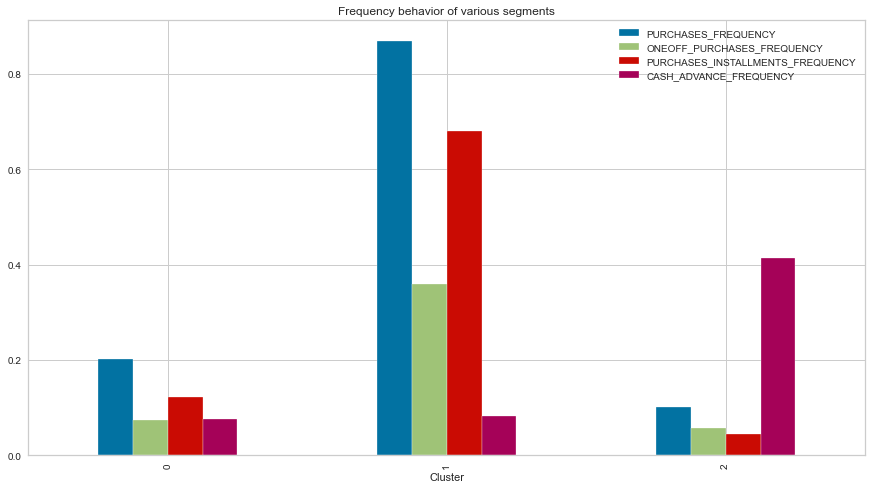

In [54]:
data_clean[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'gm_k3']].groupby('gm_k3').mean().plot.bar(figsize=(15, 8))
plt.title('Frequency behavior of various segments')
plt.xlabel('Cluster');

9.8 Checking Cluster Distribution
- It seems there is no problem for cluster 0 and 2 in Gaussian Mixture, since they have constant clusters with Kmeans & Spectral.
- However, for the clustter 1, there are differences between them.
- Since the algorithm bertween those three models are different, there is reasonable they will have different way to cluster the data.

In [55]:
gm_cluster_0 = data_clean[data_clean['gm_k3'] == 0]
gm_cluster_0[['Cluster_k3', 'sc_3', 'gm_k3']].head()

,Cluster_k3,sc_3,gm_k3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [56]:
gm_cluster_1 = data_clean[data_clean['gm_k3'] == 1]
gm_cluster_1[['Cluster_k3', 'sc_3', 'gm_k3']].head()

,Cluster_k3,sc_3,gm_k3
34,0,0,1
36,0,0,1
42,1,0,1
43,2,0,1
46,2,1,1


In [57]:
gm_cluster_2 = data_clean[data_clean['gm_k3'] == 2]
gm_cluster_2[['Cluster_k3', 'sc_3', 'gm_k3']].head()

,Cluster_k3,sc_3,gm_k3
2326,2,1,2
2328,2,1,2
2332,2,1,2
2335,2,1,2
2336,2,1,2


9.9 Gaussian Mixture Cluster in 2D
- Here we can see that the data are indeed do clustering in the plot with clear  border.
- Although, there are some data are located in other cluster and overlapping it.

<AxesSubplot:>

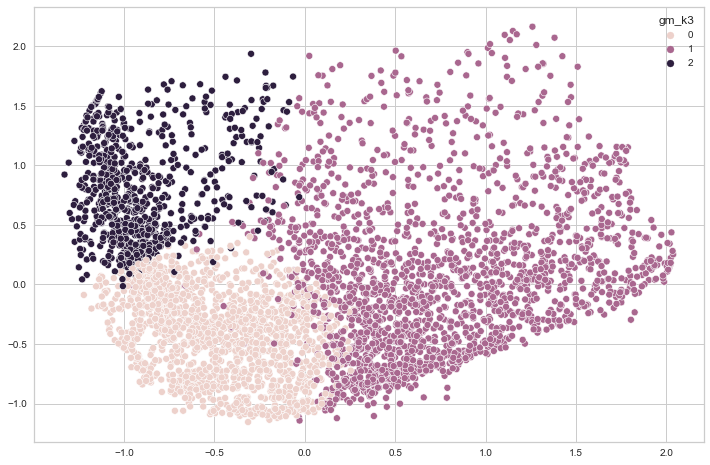

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=data_scaled_2d[:,0], y=data_scaled_2d[:,1], hue=data_clean.gm_k3)

___

# 10. Overall Analysis

- We can do segmentation with KMeans, Spectral Clustering and Gaussian Mixture.
- With different model will come the different outcome of cluster
- We can set the hyper-parameter to change how the model works.